In [136]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import lightgbm as lgb
from imblearn.over_sampling import SMOTE


In [70]:
os.chdir("C:/Users/NIshant/Downloads")

In [71]:
train=pd.read_csv("train_LZdllcl.csv")

In [72]:
test=pd.read_csv("test_2umaH9m.csv")

In [73]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


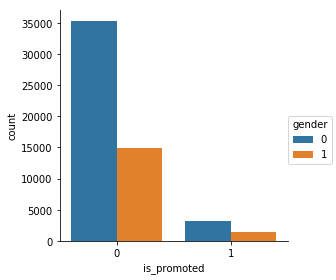

In [132]:
sns.factorplot('is_promoted',data=df,kind='count',hue='gender')

In [134]:
train[train.columns[1:]].corr()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,age_years
department,1.000000,0.017103,0.078665,-0.011459,-0.005758,-0.050313,0.065150,-0.048833,0.054972,0.003873,0.334774,0.001357,-0.048017
education,0.017103,1.000000,-0.017288,0.020388,0.037147,-0.389753,-0.010256,-0.265386,-0.001250,-0.000495,-0.016344,-0.025438,-0.369872
gender,0.078665,-0.017288,1.000000,-0.008850,-0.084501,0.016293,0.024232,0.019675,0.037400,-0.002381,0.024494,0.011109,0.016685
recruitment_channel,-0.011459,0.020388,-0.008850,1.000000,-0.014879,-0.027118,0.033365,-0.014669,0.018660,-0.003819,0.009925,0.009438,-0.026989
no_of_trainings,-0.005758,0.037147,-0.084501,-0.014879,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896,-0.075976
age,-0.050313,-0.389753,0.016293,-0.027118,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166,0.935662
previous_year_rating,0.065150,-0.010256,0.024232,0.033365,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320,0.005812
length_of_service,-0.048833,-0.265386,0.019675,-0.014669,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670,0.622851
KPIs_met >80%,0.054972,-0.001250,0.037400,0.018660,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582,-0.023077
awards_won?,0.003873,-0.000495,-0.002381,-0.003819,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871,-0.006833


In [74]:
df=train

In [75]:
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_years'] = pd.cut(df.age, range(20, 81, 10), right=False, labels=age_labels)
test['age_years'] = pd.cut(test.age, range(20, 81, 10), right=False, labels=age_labels)

In [76]:
df['gender'] = df['gender'].replace({'m':0, 'f':1})
df['education'] = df['education'].replace({"Master's & above":0, "Bachelor's":1, "Below Secondary":2})
df['department'] = df['department'].replace({'Sales & Marketing':0, 'Operations':1, 'Technology':2, 'Analytics':3, 'R&D':4,
 'Procurement':5, 'Finance':6, 'HR':7, 'Legal':8})
df['recruitment_channel'] = df['recruitment_channel'].replace({'other':0, 'sourcing':1,'referred':2})


In [77]:
df['age_years'] = df['age_years'].replace({'20-29':0, '30-39':1, '40-49':2, '50-59':3, '60-69':4, '70-79':5})

In [78]:
test['gender'] = test['gender'].replace({'m':0, 'f':1})
test['education'] = test['education'].replace({"Master's & above":0, "Bachelor's":1, "Below Secondary":2})
test['department'] = test['department'].replace({'Sales & Marketing':0, 'Operations':1, 'Technology':2, 'Analytics':3, 'R&D':4,
 'Procurement':5, 'Finance':6, 'HR':7, 'Legal':8})
test['recruitment_channel'] = test['recruitment_channel'].replace({'other':0, 'sourcing':1,'referred':2})
test['age_years'] = test['age_years'].replace({'20-29':0, '30-39':1, '40-49':2, '50-59':3, '60-69':4, '70-79':5})


In [79]:
df.describe()


,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,age_years
count,54808.000000,54808.000000,52399.000000,54808.000000,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,2.222668,0.730529,0.297621,0.465334,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170,1.026675
std,22586.581449,2.292378,0.477060,0.457216,0.538959,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137,0.832047
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000,0.000000
25%,19669.750000,0.000000,0.000000,0.000000,0.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000,0.000000
50%,39225.500000,1.000000,1.000000,0.000000,0.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000,1.000000
75%,58730.500000,4.000000,1.000000,1.000000,1.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000,1.000000
max,78298.000000,8.000000,2.000000,1.000000,2.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000,4.000000


In [80]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,age_years
0,65438,0,region_7,0.0,1,1,1,35,5.0,8,1,0,49,0,1
1,65141,1,region_22,1.0,0,0,1,30,5.0,4,0,0,60,0,1
2,7513,0,region_19,1.0,0,1,1,34,3.0,7,0,0,50,0,1
3,2542,0,region_23,1.0,0,0,2,39,1.0,10,0,0,50,0,1
4,48945,2,region_26,1.0,0,0,1,45,3.0,2,0,0,73,0,2


In [ ]:
a=df["department"].unique()

In [81]:
df_train=df
df_renewed = df.is_promoted
df_train= df_train.drop('is_promoted',axis=1)
df_train= df_train.drop('age',axis=1)

In [88]:
df_train= df_train.drop('region',axis=1)
test= test.drop('region',axis=1)
test= test.drop('age',axis=1)

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(df_train,df_renewed,test_size=0.2)

In [84]:
df_train.head()

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,age_years
0,65438,0,0.0,1,1,1,5.0,8,1,0,49,1
1,65141,1,1.0,0,0,1,5.0,4,0,0,60,1
2,7513,0,1.0,0,1,1,3.0,7,0,0,50,1
3,2542,0,1.0,0,0,2,1.0,10,0,0,50,1
4,48945,2,1.0,0,0,1,3.0,2,0,0,73,2


In [ ]:
df["region"].unique()

In [ ]:
X_train["region"] == 'region_7'

In [ ]:
j=0;
for i in X_train["region"].unique():
    if (X_train["region"] == i):
        j+=1
        X_train["region"]=j

In [ ]:
df['Count_3-6_months_late'].fillna(df['Count_3-6_months_late'].median(),inplace=True)

In [ ]:
X_train.columns

In [85]:
for i in df_train.columns:
    df_train[i].fillna(df_train[i].median(),inplace=True)

In [92]:
X_train.columns

Index(['employee_id', 'department', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'age_years'],
      dtype='object')

In [153]:
d_train = lgb.Dataset(X_train, label=Y_train)

params = {}
params['learning_rate'] = 0.1
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
# params['sub_feature'] = 0.5
# params['num_leaves'] = 10
# params['min_data'] = 50
# params['max_depth'] = 10

decision_tree= lgb.train(params, d_train, 100)

In [150]:
columns=['employee_id', 'department', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'age_years']
#decision_tree = LogisticRegression()
# decision_tree = GaussianNB()
# decision_tree=XGBClassifier(n_estimators=500,max_depth=10,colsample_bytree=0.4)
# decision_tree = lightgbm.train(parameters,
#                        train_data,
#                        valid_sets=test_data,
#                        num_boost_round=5000,
#                        early_stopping_rounds=100)
# decision_tree.fit(X_train, Y_train)
Y_pred2 = decision_tree.predict(X_test)
# Y_pred2 = decision_tree.predict(test[columns])

In [144]:
Y_pred2.shape[0]

10962

In [151]:
for i in range(0,Y_pred2.shape[0]):
    if Y_pred2[i]>=.6:       # setting threshold to .5
       Y_pred2[i]=1
    else:  
       Y_pred2[i]=0

In [122]:
decision_tree

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=600,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [116]:
submission = pd.DataFrame({
        "employee_id":test["employee_id"],
        "is_promoted": Y_pred2
    })
submission.to_csv("submission.csv",index=False)

In [152]:
metrics.confusion_matrix(Y_test, Y_pred2)

array([[10064,     0],
       [  704,   194]], dtype=int64)